In [1]:
from pynq import Overlay, allocate
import matplotlib.pyplot as plt
import pynq_composable
import numpy as np
import time

In [17]:
ol = Overlay("mpsoc3.bit")
cfilter = ol.custom_IP
#cfilter.c_dict

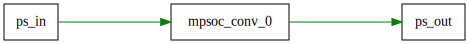

In [18]:
cfilter.compose([cfilter.ps_in, cfilter.mpsoc_conv_0, cfilter.ps_out])

cfilter.graph

In [19]:
dma_send = ol.axi_dma.sendchannel
dma_recv = ol.axi_dma.recvchannel

In [20]:
image_size = 1300

input_buffer = allocate(shape=(2*image_size*image_size,), dtype=np.int32)
input_buffer[:] = np.ones(shape=(2*image_size*image_size,), dtype=np.int32)

output_buffer = allocate(shape=((image_size-2)*(image_size-2),), dtype=np.int64)

start_time = time.time()
dma_recv.transfer(output_buffer)
dma_send.transfer(input_buffer)
dma_send.wait()
dma_recv.wait()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.006800413131713867 seconds ---


In [30]:
print(output_buffer[904803]) #1684803

0
